In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from collections import Counter
from functools import reduce
from cobra.io import read_sbml_model, load_json_model, load_matlab_model
from google_sheet import GoogleSheet

## Comparison of Metabolic Reconstructions

In [2]:
# Generate models for comparison
icho1766 = read_sbml_model('../Data/reconciliation/models/iCHOv1_final.xml')
icho2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
icho2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
recon3d = load_matlab_model('../Data/Reconciliation/models/Recon3D_301.mat')
iCHO3000 = load_json_model('iCHO3595.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16


No defined compartments in model Recon3D. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


In [4]:
##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'
# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)

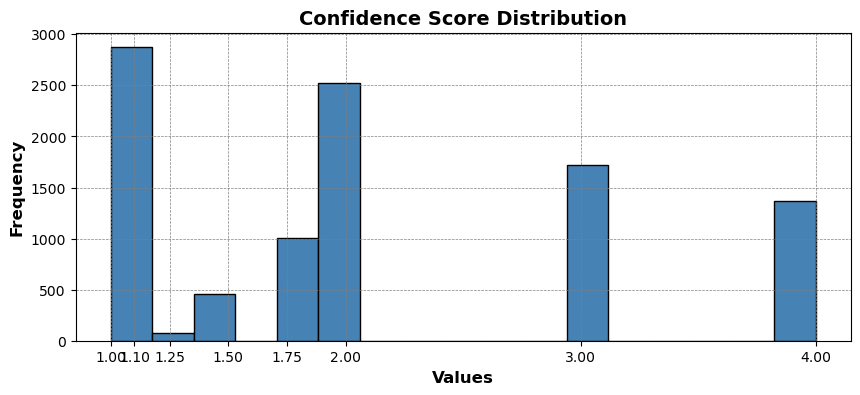

In [4]:
#### --- Conf. Score distribution throughout the dataset --- ####
data_numeric = pd.to_numeric(rxns['Conf. Score'], errors='coerce')
data_numeric = data_numeric.dropna()

# Plotting the histogram
plt.figure(figsize=(10, 4))
plt.hist(data_numeric, bins='auto', color='steelblue', edgecolor='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(data_numeric.unique())
plt.xlabel('Values', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Confidence Score Distribution', fontsize=14, fontweight='bold')

plt.savefig('../Analyses/conf_score_distribution.png', dpi=300)
plt.show()

In [5]:
#### --- Calculate the amount of reactions per Subsystem ---- ####

#iCHO 1766
subs = []
for reaction in icho1766.reactions:
    subs.append(reaction.subsystem.upper())
    
icho1766_subs = Counter(subs)

#iCHO 2291
subs = []
for reaction in icho2291.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2291_subs = Counter(subs)

# iCHO 2101
subs = []
for reaction in icho2101.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2101_subs = Counter(subs)

# Recon3D
subs = []
for reaction in recon3d.reactions:
    subs.append(reaction.subsystem.upper())
    
recon3d_subs = Counter(subs)

#iCHO 3644
subs = []
for reaction in iCHO3000.reactions:
    subs.append(reaction.subsystem.upper())
    
iCHO3000_subs = Counter(subs)

In [6]:
# Mapping of subsystems to categories
category_mapping = {
    'Amino Acid Metabolism and Derivatives': [
        'ARGININE AND PROLINE METABOLISM', 'METHIONINE METABOLISM', 'AMINO ACID DERIVATIVE', 
        'GLYCINE, SERINE, AND THREONINE METABOLISM', 'HISTIDINE METABOLISM', 'LYSINE METABOLISM', 
        'METHIONINE AND CYSTEINE METABOLISM', 'TYROSINE METABOLISM', 'VALINE, LEUCINE, AND ISOLEUCINE METABOLISM',
        'ALANINE AND ASPARTATE METABOLISM', 'AMINOSUGAR METABOLISM', 'SELENOAMINO ACID METABOLISM',
        'GLYCINE, SERINE, ALANINE, AND THREONINE METABOLISM'
    ],
    'Carbohydrate and Energy Metabolism': [
        'GLYCOLYSIS/GLUCONEOGENESIS', 'FRUCTOSE AND MANNOSE METABOLISM', 'CENTRAL CARBON AND ENERGY METABOLISM',
        'GALACTOSE METABOLISM', 'PENTOSE AND GLUCURONATE INTERCONVERSIONS', 'STARCH AND SUCROSE METABOLISM',
        'PENTOSE PHOSPHATE PATHWAY', 'PYRUVATE METABOLISM'
    ],
    'Lipid and Fatty Acid Metabolism': [
        'FATTY ACID ELONGATION', 'FATTY ACID METABOLISM', 'CHOLESTEROL METABOLISM', 'EICOSANOID METABOLISM',
        'ARACHIDONIC ACID METABOLISM', 'BILE ACID SYNTHESIS', 'FATTY ACID SYNTHESIS', 'GLYCEROLIPID METABOLISM',
        'SPHINGOLIPID METABOLISM', 'SQUALENE AND CHOLESTEROL SYNTHESIS', 'STEROID METABOLISM', 'TRIACYLGLYCEROL SYNTHESIS',
        'VITAMIN A METABOLISM', 'VITAMIN D METABOLISM', 'LINOLEATE METABOLISM', 'FATTY ACID OXIDATION'
    ],
    'Nucleotide and Nucleic Acid Metabolism': [
        'PURINE CATABOLISM', 'PYRIMIDINE BIOSYNTHESIS', 'NUCLEOTIDE SALVAGE PATHWAY', 'NUCLEOTIDES',
        'NUCLEOTIDE INTERCONVERSION', 'PURINE SYNTHESIS', 'PYRIMIDINE SYNTHESIS', 'PYRIMIDINE CATABOLISM',
        'NUCLEOTIDE SUGAR METABOLISM'
    ],
    'Vitamin and Cofactor Metabolism': [
        'VITAMIN B12 METABOLISM', 'VITAMIN C METABOLISM', 'VITAMIN D', 'VITAMIN A METABOLISM',
        'VITAMIN E METABOLISM', 'VITAMIN B2 METABOLISM', 'VITAMIN B6 METABOLISM', 'FOLATE METABOLISM',
        'BIOTIN METABOLISM', 'THIAMINE METABOLISM', 'TETRAHYDROBIOPTERIN METABOLISM', 'VITAMIN K METABOLISM',
        'VITAMIN AND COFACTOR METABOLISM'
    ],
    'Glycan, Glycosaminoglycan, and Glycolipid Metabolism': [
        'N-GLYCAN BIOSYNTHESIS', 'GLYCOSPHINGOLIPID METABOLISM', 'CHONDROITIN SYNTHESIS', 'KERATAN SULFATE DEGRADATION',
        'HEPARAN SULFATE DEGRADATION', 'HYALURONAN METABOLISM', 'N-GLYCAN DEGRADATION', 'O-GLYCAN SYNTHESIS',
        'GLYCOSPHINGOLIPID METABOLISM', 'KERATAN SULFATE SYNTHESIS', 'N-GLYCAN SYNTHESIS', 'N-GLYCAN METABOLISM',
        'O-GLYCAN METABOLISM'
    ],
    'Protein and Peptide Metabolism': [
        'PROTEIN PRODUCTION', 'PROTEIN ASSEMBLY', 'PROTEIN DEGRADATION', 'PROTEIN MODIFICATION',
        'PEPTIDE METABOLISM', 'UBIQUINONE SYNTHESIS', 'HEME SYNTHESIS', 'PROTEIN PRODUCTION'
    ],
    'Xenobiotic and Drug Metabolism': [
        'CYP METABOLISM', 'CYTOCHROME METABOLISM', 'XENOBIOTICS METABOLISM', 'ROS DETOXIFICATION',
        'DRUG METABOLISM', 'ALKALOID SYNTHESIS'
    ],
    'Miscellaneous and Complex Pathways': [
        'BIOMASS SYNTHESIS', 'R GROUP SYNTHESIS', 'MISCELLANEOUS', 'BIOMASS AND MAINTENANCE FUNCTIONS',
        'UNASSIGNED', 'OTHER CARBON METABOLISM'
    ]
}

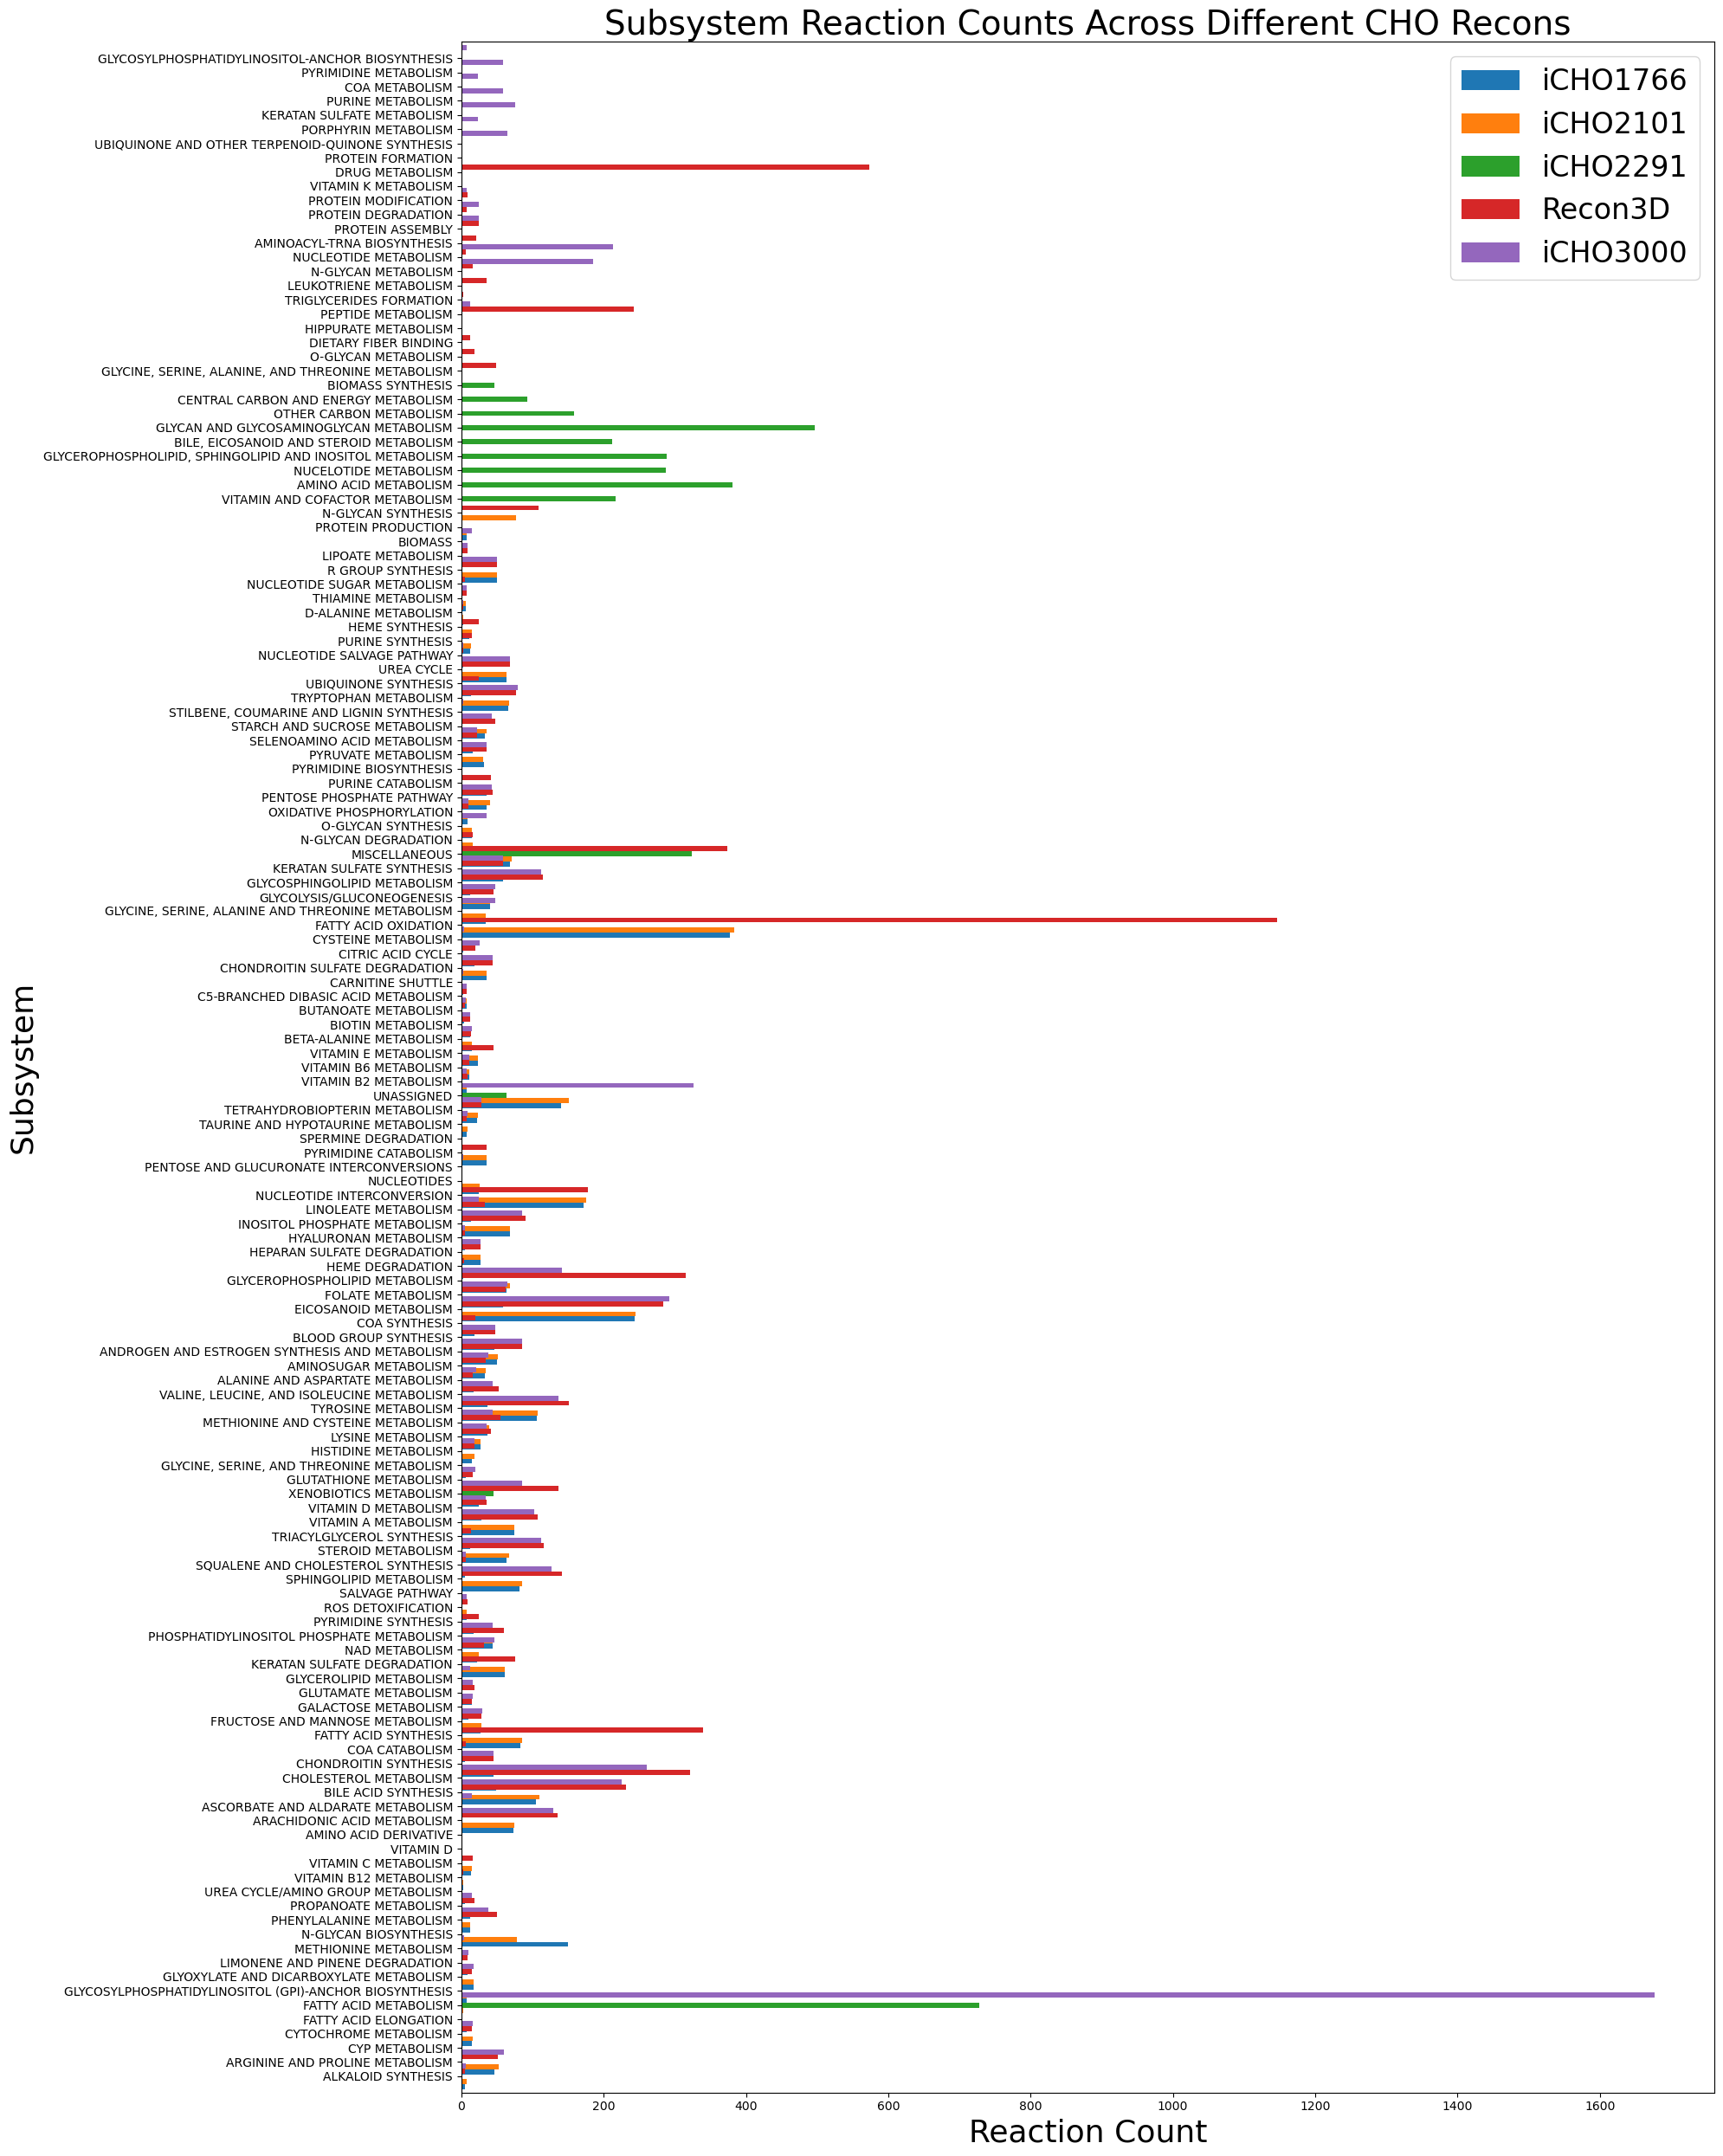

In [7]:
# Convert Counters to DataFrames
df_icho1766 = pd.DataFrame.from_dict(icho1766_subs, orient='index', columns=['iCHO1766'])
df_icho2291 = pd.DataFrame.from_dict(icho2291_subs, orient='index', columns=['iCHO2291'])
df_icho2101 = pd.DataFrame.from_dict(icho2101_subs, orient='index', columns=['iCHO2101'])
df_recon3d = pd.DataFrame.from_dict(recon3d_subs, orient='index', columns=['Recon3D'])
df_iCHO3000 = pd.DataFrame.from_dict(iCHO3000_subs, orient='index', columns=['iCHO3000'])

# Combine the DataFrames
combined_df = pd.concat([df_icho1766, df_icho2101, df_icho2291, df_recon3d, df_iCHO3000], axis=1).fillna(0)

# Create a mask where each row is True if all its values are non-zero
#non_zero_mask = (combined_df != 0).all(axis=1)

# Apply the mask to filter out rows with any zero values
#filtered_df = combined_df[non_zero_mask]

# Create a mask where each row is True if the index does not start with "Transport"
mask = ~combined_df.index.str.startswith('TRANSPORT') & ~combined_df.index.str.startswith("EXCHANGE") & ~combined_df.index.str.startswith("SINK") & ~combined_df.index.str.startswith("DEMAND") & ~combined_df.index.str.startswith("INTRACELLULAR") & ~combined_df.index.str.startswith("EXTRACELLULAR")


# Apply the mask to the DataFrame to keep only rows that do not start with "Transport"
filtered_df = combined_df[mask]

# Plot 
ax = filtered_df.plot(kind='barh', figsize=(20, 25), width=1.8) 

# Title and labels
plt.title('Subsystem Reaction Counts Across Different CHO Recons', fontsize=28)
plt.ylabel('Subsystem', fontsize=26)  # This was previously 'xlabel'
plt.xlabel('Reaction Count', fontsize=26)  # This was previously 'ylabel'

# Adjust the layout
plt.tight_layout()  

# Customize legend
plt.legend(fontsize=24)

# Save the plot to a file
plt.savefig('../Analyses/recons_comparisons/subsystem_reaction_counts.png', dpi=300)  
# Show the plot
plt.show()

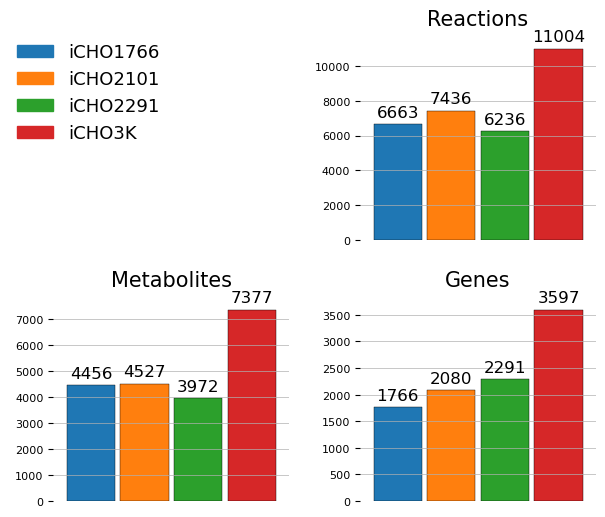

In [38]:
#Reaction counts for each recon
icho1766_rxns = len(icho1766.reactions)
icho2291_rxns = len(icho2291.reactions)
icho2101_rxns = len(icho2101.reactions)
recon3d_rxns = len(recon3d.reactions)
icho3000_rxns = len(iCHO3000.reactions)

#Metabolite counts for each recon
icho1766_mets = len(icho1766.metabolites)
icho2291_mets = len(icho2291.metabolites)
icho2101_mets = len(icho2101.metabolites)
recon3d_mets = len(recon3d.metabolites)
icho3000_mets = len(iCHO3000.metabolites)

# Gene counts for each recon
icho1766_gens = len(icho1766.genes)
icho2291_gens = len(icho2291.genes)
icho2101_gens = len(icho2101.genes)
recon3d_gens = len(recon3d.genes)
icho3000_gens = len(iCHO3000.genes)

# Subsystem count for each recon
icho1766_subs_count = len(icho1766_subs)
icho2291_subs_count = len(icho2291_subs)
icho2101_subs_count = len(icho2101_subs)
recon3d_subs_count = len(recon3d_subs)
icho3000_subs_count = len(iCHO3000_subs)


# Creating a DataFrame from the counts
data = {
    'iCHO1766': [icho1766_rxns, icho1766_mets, icho1766_gens],# icho1766_subs_count],
    'iCHO2101': [icho2101_rxns, icho2101_mets, icho2101_gens],# icho2101_subs_count],
    'iCHO2291': [icho2291_rxns, icho2291_mets, icho2291_gens],# icho2291_subs_count],
    'iCHO3K': [icho3000_rxns, icho3000_mets, icho3000_gens],# icho3000_subs_count],
    #'Recon3D': [recon3d_rxns, recon3d_mets, recon3d_gens, recon3d_subs_count]
}

counts_df = pd.DataFrame(data, index=['Reactions', 'Metabolites', 'Genes'])

# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
    
    # Turn off the first subplot
    ax1, ax2, ax3, ax4 = axes.flatten()
    ax1.axis('off')
    
    # Define the axes for the categories
    axes_mapping = {0: ax2, 1: ax3, 2: ax4}
    categories = ['Reactions', 'Metabolites', 'Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=10)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([]) # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=8)

    # Remove border of the plots
    for ax in [ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Create custom handles for the legend
    custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
    fig.legend(handles=custom_handles, loc='upper left',bbox_to_anchor=(0.05, 0.9), fontsize=13, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    plt.savefig('../Analyses/recons_comparisons/metabolic_models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
create_research_plot(counts_df)

In [9]:
import re
list1 = [re.sub(r'\[.*?\]', '', m.id) for m in recon3d.metabolites]
set1 = set(list1)
print(len(list1))
print(len(set1))
print('----------------------------------------')
list2 = [m.id[:-2] for m in icho1766.metabolites]
set2 = set(list2)
print(len(list2))
print(len(set2))
print('----------------------------------------')
list3 = [m.id[:-2] for m in icho2101.metabolites]
set3 = set(list3)
print(len(list3))
print(len(set3))
print('----------------------------------------')
list4 = [m.id[:-2] for m in icho2291.metabolites]
set4 = set(list4)
print(len(list4))
print(len(set4))
print('----------------------------------------')
list5 = [m.id[:-2] for m in iCHO3000.metabolites]
set5 = set(list5)
print(len(list5))
print(len(set5))

8399
4140
----------------------------------------
4456
2342
----------------------------------------
4527
2406
----------------------------------------
3972
2078
----------------------------------------
7377
3696


In [10]:
icho3000_subs_count

104

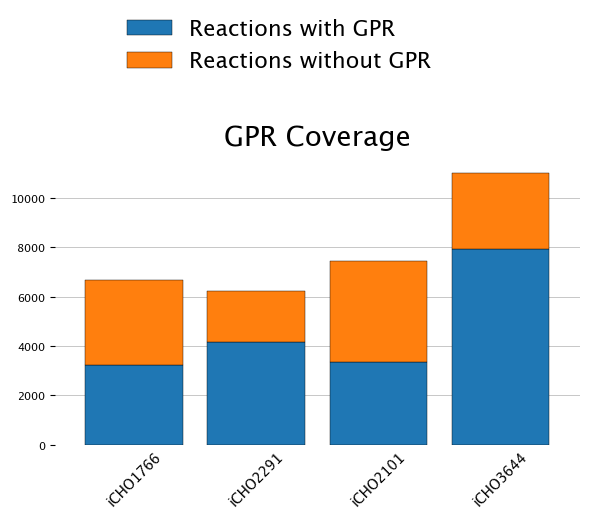

In [11]:
# Initialize a dictionary to store the counts
counts = {
    'Model': [],
    'Reactions with GPR': [],
    'Reactions without GPR': [],
    'Total Reactions': []
}

# Loop through the models and calculate counts
models = [icho1766, icho2291, icho2101, iCHO3000]#, recon3d]
model_names = ['iCHO1766', 'iCHO2291', 'iCHO2101', 'iCHO3644']#, 'Recon3D']

for model, name in zip(models, model_names):
    rxn_with_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) not in ['', 'nan'])
    rxn_without_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) in ['', 'nan'])
    total = len(model.reactions)

    counts['Model'].append(name)
    counts['Reactions with GPR'].append(rxn_with_gpr)
    counts['Reactions without GPR'].append(rxn_without_gpr)
    counts['Total Reactions'].append(total)

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(counts)
counts_df['%'] = (counts_df['Reactions with GPR']/counts_df['Total Reactions'])*100

# Setting the index to the model names
counts_df.set_index('Model', inplace=True)

def plot_gpr_coverage(counts_df):
    # Create a plot with the right size and stacked bars directly
    ax = counts_df[['Reactions with GPR', 'Reactions without GPR']].plot(
        kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=.3, width=0.8, legend=False, figsize=(6, 6))
    plt.title('GPR Coverage', fontsize=20, pad=10)


    # Label configuration
    ax.tick_params(axis='x', rotation=0)  # Set rotation for x ticks if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels if needed
    ax.set_xlabel('')

    # Grid and axis adjustments
    ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
    ax.set_axisbelow(True)  # Ensure grid is behind the bars

    # Hide x-axis ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', labelsize=8)

    # Remove plot frame borders
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    # Legend configuration
    ax.legend(loc='center left',bbox_to_anchor=(0.1, 1.4), fontsize=16, frameon=False, fancybox=False, shadow=False)


    # Optimize layout
    plt.tight_layout()

    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/gpr_coverage.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


# Call the function with the DataFrame
plot_gpr_coverage(counts_df)

In [12]:
counts_df

,Reactions with GPR,Reactions without GPR,Total Reactions,%
Model,,,,
iCHO1766,3229,3434,6663,48.461654
iCHO2291,4182,2054,6236,67.062219
iCHO2101,3339,4097,7436,44.903174
iCHO3644,7920,3084,11004,71.973828


## Gene Essentiality

In [5]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time
import cobra
from cobra.io import load_json_model, read_sbml_model
from cobra.flux_analysis.variability import find_essential_genes

iCHO3K = load_json_model('iCHO3595.json')
iCHO1766 = read_sbml_model('../Data/Reconciliation/models/iCHOv1_final.xml')
iCHO2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
iCHO2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16


In [6]:
# Load the dataset for the experimentally validated essential genes

exp_essential_genes = pd.read_csv('../Data/Gene_Essentiality/cho_essential_genes.csv', sep='\t')
exp_essential_genes['gene'] = exp_essential_genes['gene'].str.replace('__1$', '', regex=True)
# Extract all gene names
all_gene_names = set()
for names in exp_essential_genes['gene']:
    for name in names.split('|'): #Extract the names of the genes with two aliases
        all_gene_names.add(name)

In [7]:
''' In case of retrieving the gene ID please activate this code
# Generation gene ID of exp_essential_genes with biopython
from Bio import Entrez
import pandas as pd

# Set your email (this is required by NCBI for accessing their services)
Entrez.email = "dh.choi@orcid"

# Your dataset with gene symbols (replace with actual dataframe)
gene_symbols = exp_essential_genes.gene  # Example gene symbols

# Function to fetch gene ID using Entrez API
def get_gene_id(gene_symbol):
    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")
    record = Entrez.read(search_handle)
    search_handle.close()
    if record["IdList"]:
        return record["IdList"][0]  # Return the first gene ID found
    else:
        return None

# Create a DataFrame to store gene symbols and their corresponding gene IDs
df = pd.DataFrame({'gene': gene_symbols})
df['entrez_gene_id'] = df['gene'].apply(get_gene_id)

# Display the result
print(df)

# Save the DataFrame to a pickle file
with open("gene_id_mapping.pkl", "wb") as f:
    pickle.dump(df, f)

# Save the result to a CSV file as well, if needed
df.to_csv("gene_id_mapping.csv", index=False)

'''

' In case of retrieving the gene ID please activate this code\n# Generation gene ID of exp_essential_genes with biopython\nfrom Bio import Entrez\nimport pandas as pd\n\n# Set your email (this is required by NCBI for accessing their services)\nEntrez.email = "dh.choi@orcid"\n\n# Your dataset with gene symbols (replace with actual dataframe)\ngene_symbols = exp_essential_genes.gene  # Example gene symbols\n\n# Function to fetch gene ID using Entrez API\ndef get_gene_id(gene_symbol):\n    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")\n    record = Entrez.read(search_handle)\n    search_handle.close()\n    if record["IdList"]:\n        return record["IdList"][0]  # Return the first gene ID found\n    else:\n        return None\n\n# Create a DataFrame to store gene symbols and their corresponding gene IDs\ndf = pd.DataFrame({\'gene\': gene_symbols})\ndf[\'entrez_gene_id\'] = df[\'gene\'].apply(get_gene_id)\n\n# Display the result\np

In [8]:
# Load the DataFrame from the pickle file
with open("gene_id_mapping.pkl", "rb") as f:
    df_loaded = pickle.load(f)

# Display the loaded DataFrame
print(df_loaded)

          gene entrez_gene_id
0          Ubc      100689267
1       Ncaph2      100756862
2        Huwe1      100757403
3      Isg20l2      100752909
4        Coq8b      100770066
...        ...            ...
1975     Sprtn      100764217
1976     Perm1      100773289
1977   Tmem147      100751744
1978    Rnf216      100758416
1979  Rnaseh2b      100751948

[1980 rows x 2 columns]


In [9]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_zela_dict.pkl', 'rb') as file:
    uptsec_intrvl_zela = pickle.load(file)
    
temp_dict_zela = uptsec_intrvl_zela
temp_dict_wt = uptsec_intrvl_wt

In [10]:
def constraint_model_feg(model, time, exp_dict, objective=None, solver=None, make_GM=None):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - time: Time interval for applying the experimental constraints. Default is 'P2 to P4'.
    - objective: The objective reaction. Default is 'biomass_cho_s'.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    
    GM = model.copy()  # Copy the model to avoid modifying the original
    temp_dict = exp_dict
    
    # Default values if no argument is provided
    if objective is None:
        objective = 'biomass_cho_s'
    if solver is None:
        solver = 'gurobi'

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    # Constraint the model with experimental data
    if objective is None:
        GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    
    for rxn in GM.boundary:
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue

        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.1,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
#         if rxn.id.startswith("SK_"):
#             rxn.bounds = (0,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
    model_exp_constrained = GM 
    
    if make_GM == True:
        for rxn in GM.boundary:
            if rxn.id in temp_dict.keys():
                rxn.bounds = (-1000,1000)
                print(rxn.bounds)
                print(rxn)
                continue
        pfba_solution_GM = cobra.flux_analysis.pfba(GM)
        pfba_obj_GM = pfba_solution_GM.fluxes[objective] 
        print(f"Optimized objective w/ opened bounds (growth rate): {pfba_obj_GM}")
    else: 
        pfba_obj_GM =[]
        GM = []
            
            
    # Perform pFBA (parsimonious FBA) to minimize the total flux
    pfba_solution = cobra.flux_analysis.pfba(model_exp_constrained)
    pfba_obj = pfba_solution.fluxes[objective]

    # Print and return the objective value and the full pFBA solution
    print(f"Optimized objective w/ exp constraints (growth rate): {pfba_obj}")
    
    # Return the objective value and the full pFBA solution
    return model_exp_constrained, pfba_obj, pfba_solution, pfba_obj_GM, GM

In [11]:
def find_and_match_essential_genes(model, df_exp_essential, save_csv=True, print_df=False, model_GM = None):
    """
    This function finds and matches essential genes in the model with experimental Entrez gene data.
    It returns the number of total matched genes (len_mat) and the number of essential matched genes (len_mat_ess).
    """

    # Check if the necessary columns 'entrez_gene_id' and 'gene' exist in the dataframe
    required_columns = ['entrez_gene_id', 'gene']
    for col in required_columns:
        if col not in df_exp_essential.columns:
            raise KeyError(f"Column '{col}' is missing from the dataframe.")

    # Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
    entrez_dict = df_exp_essential.set_index('entrez_gene_id')['gene'].to_dict()

    # Matching metabolic genes
    tmp_gene = []    
    for gene in model.genes:
        # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
        if gene.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene.id]
            tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
    
    # Number of total matched genes
    len_mat = len(tmp_gene)

    # Find the essential genes for the given model
    essential_genes = find_essential_genes(model)
    
    # Create a list to store the matched essential genes
    matched_genes = []

    # Iterate over the essential genes and check if they match with the Entrez Gene IDs
    for gene in essential_genes:
        gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

        if gene_exp_ess.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
            matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))

    # Convert the matched essential genes into a DataFrame
    matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

    # Save the result to a CSV file if save_csv is True
    if save_csv:
        matched_genes_essential_df.to_csv("'../Data/Gene_Essentiality/matched_gene_entrez_ids_feg.csv", index=False)

    # Print the DataFrame if print_df is True
    if print_df:
        print(matched_genes_essential_df)

    # Number of essential matched genes
    len_mat_ess = len(matched_genes_essential_df)
    
    if model_GM is None:
        # Print the summary information
        print(f"Total matched metabolic genes: {len_mat}")
        print(f"Matched essential genes: {len_mat_ess}/{len_mat}")
        len_mat_GM_ess = []
    else: 
        
        essential_genes = find_essential_genes(model_GM)

        # Create a list to store the matched essential genes
        matched_genes_GM = []

        # Iterate over the essential genes and check if they match with the Entrez Gene IDs
        for gene in essential_genes:
            gene_exp_ess_GM = model_GM.genes.get_by_id(gene.id)  # Get the gene from the model

            if gene_exp_ess_GM.id in entrez_dict:
                entrez_gene_symbol = entrez_dict[gene_exp_ess_GM.id]
                matched_genes_GM.append((gene_exp_ess_GM.id, gene_exp_ess_GM.name, entrez_gene_symbol))

        # Convert the matched essential genes into a DataFrame
        matched_genes_essential_GM_df = pd.DataFrame(matched_genes_GM, columns=['gene_exp_ess_GM.id', 'gene_exp_ess_GM.name', 'entrez_gene_symbol'])
        len_mat_GM_ess = len(matched_genes_essential_GM_df)
        # Print the summary information
        print(f"Total matched metabolic genes_GM: {len_mat}")
        print(f"Matched essential genes_GM: {len_mat_GM_ess}/{len_mat}")
        


    # Return the matched DataFrame and gene counts
    return matched_genes_essential_df, len_mat, len_mat_ess, len_mat_GM_ess

In [12]:
def update_reaction_ids_specific(model):
    # Iterate over each reaction in the model
    for rxn in model.reactions:
        # Check if the reaction ID contains "(e)"
        if "(e)" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("(e)", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(c)" in rxn.id:
            new_id = rxn.id.replace("(c)", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(x)" in rxn.id:
            new_id = rxn.id.replace("(x)", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(r)" in rxn.id:
            new_id = rxn.id.replace("(r)", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(g)" in rxn.id:
            new_id = rxn.id.replace("(g)", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_e_" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("_e_", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_c_" in rxn.id:
            # Replace "_c_" with "_c"
            new_id = rxn.id.replace("_c_", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_x_" in rxn.id:
            new_id = rxn.id.replace("_x_", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_r_" in rxn.id:
            new_id = rxn.id.replace("_r_", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_g_" in rxn.id:
            new_id = rxn.id.replace("_g_", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
    return model

In [13]:
iCHO2291_changed = update_reaction_ids_specific(iCHO2291)
iCHO1766_changed = update_reaction_ids_specific(iCHO1766)
iCHO2101_changed = update_reaction_ids_specific(iCHO2101)

Updating reaction ID: EX_10fthf(e) -> EX_10fthf_e
Updating reaction ID: EX_10fthf5glu(e) -> EX_10fthf5glu_e
Updating reaction ID: EX_10fthf6glu(e) -> EX_10fthf6glu_e
Updating reaction ID: EX_10fthf7glu(e) -> EX_10fthf7glu_e
Updating reaction ID: EX_11_cis_retfa(e) -> EX_11_cis_retfa_e
Updating reaction ID: EX_13_cis_retnglc(e) -> EX_13_cis_retnglc_e
Updating reaction ID: EX_1glyc_cho(e) -> EX_1glyc_cho_e
Updating reaction ID: EX_1mncam(e) -> EX_1mncam_e
Updating reaction ID: EX_23cump(e) -> EX_23cump_e
Updating reaction ID: EX_2425dhvitd2(e) -> EX_2425dhvitd2_e
Updating reaction ID: EX_2425dhvitd3(e) -> EX_2425dhvitd3_e
Updating reaction ID: EX_24nph(e) -> EX_24nph_e
Updating reaction ID: EX_25hvitd2(e) -> EX_25hvitd2_e
Updating reaction ID: EX_25hvitd3(e) -> EX_25hvitd3_e
Updating reaction ID: EX_2hb(e) -> EX_2hb_e
Updating reaction ID: EX_2mcit(e) -> EX_2mcit_e
Updating reaction ID: EX_34dhoxpeg(e) -> EX_34dhoxpeg_e
Updating reaction ID: EX_34dhphe(e) -> EX_34dhphe_e
Updating reactio

Updating reaction ID: EX_eaflatoxin(e) -> EX_eaflatoxin_e
Updating reaction ID: EX_ebastine(e) -> EX_ebastine_e
Updating reaction ID: EX_ebastineoh(e) -> EX_ebastineoh_e
Updating reaction ID: EX_eicostet(e) -> EX_eicostet_e
Updating reaction ID: EX_elaid(e) -> EX_elaid_e
Updating reaction ID: EX_estradiol(e) -> EX_estradiol_e
Updating reaction ID: EX_estradiolglc(e) -> EX_estradiolglc_e
Updating reaction ID: EX_estriolglc(e) -> EX_estriolglc_e
Updating reaction ID: EX_estroneglc(e) -> EX_estroneglc_e
Updating reaction ID: EX_estrones(e) -> EX_estrones_e
Updating reaction ID: EX_etoh(e) -> EX_etoh_e
Updating reaction ID: EX_fad(e) -> EX_fad_e
Updating reaction ID: EX_fald(e) -> EX_fald_e
Updating reaction ID: EX_fe2(e) -> EX_fe2_e
Updating reaction ID: EX_fe3(e) -> EX_fe3_e
Updating reaction ID: EX_fmn(e) -> EX_fmn_e
Updating reaction ID: EX_fol(e) -> EX_fol_e
Updating reaction ID: EX_for(e) -> EX_for_e
Updating reaction ID: EX_fru(e) -> EX_fru_e
Updating reaction ID: EX_fuc_L(e) -> EX_

Updating reaction ID: EX_nrvnc(e) -> EX_nrvnc_e
Updating reaction ID: EX_o2(e) -> EX_o2_e
Updating reaction ID: EX_o2s(e) -> EX_o2s_e
Updating reaction ID: EX_oagd3_cho(e) -> EX_oagd3_cho_e
Updating reaction ID: EX_oagt3_cho(e) -> EX_oagt3_cho_e
Updating reaction ID: EX_ocdca(e) -> EX_ocdca_e
Updating reaction ID: EX_ocdcea(e) -> EX_ocdcea_e
Updating reaction ID: EX_octa(e) -> EX_octa_e
Updating reaction ID: EX_oh1(e) -> EX_oh1_e
Updating reaction ID: EX_omeprazole(e) -> EX_omeprazole_e
Updating reaction ID: EX_onpthl(e) -> EX_onpthl_e
Updating reaction ID: EX_orn(e) -> EX_orn_e
Updating reaction ID: EX_orot(e) -> EX_orot_e
Updating reaction ID: EX_oxa(e) -> EX_oxa_e
Updating reaction ID: EX_paf_cho(e) -> EX_paf_cho_e
Updating reaction ID: EX_pchol_cho(e) -> EX_pchol_cho_e
Updating reaction ID: EX_pe_cho(e) -> EX_pe_cho_e
Updating reaction ID: EX_peplys(e) -> EX_peplys_e
Updating reaction ID: EX_perillyl(e) -> EX_perillyl_e
Updating reaction ID: EX_pglyc_cho(e) -> EX_pglyc_cho_e
Updati

Updating reaction ID: EX_10fthf5glu_e_ -> EX_10fthf5glu_e
Updating reaction ID: EX_10fthf6glu_e_ -> EX_10fthf6glu_e
Updating reaction ID: EX_10fthf7glu_e_ -> EX_10fthf7glu_e
Updating reaction ID: EX_11_cis_retfa_e_ -> EX_11_cis_retfa_e
Updating reaction ID: EX_13_cis_retnglc_e_ -> EX_13_cis_retnglc_e
Updating reaction ID: EX_1glyc_cho_e_ -> EX_1glyc_cho_e
Updating reaction ID: EX_1mncam_e_ -> EX_1mncam_e
Updating reaction ID: EX_23cump_e_ -> EX_23cump_e
Updating reaction ID: EX_2425dhvitd2_e_ -> EX_2425dhvitd2_e
Updating reaction ID: EX_2425dhvitd3_e_ -> EX_2425dhvitd3_e
Updating reaction ID: EX_24nph_e_ -> EX_24nph_e
Updating reaction ID: EX_25hvitd2_e_ -> EX_25hvitd2_e
Updating reaction ID: EX_25hvitd3_e_ -> EX_25hvitd3_e
Updating reaction ID: EX_2hb_e_ -> EX_2hb_e
Updating reaction ID: EX_2mcit_e_ -> EX_2mcit_e
Updating reaction ID: EX_34dhoxpeg_e_ -> EX_34dhoxpeg_e
Updating reaction ID: EX_34dhphe_e_ -> EX_34dhphe_e
Updating reaction ID: EX_35cgmp_e_ -> EX_35cgmp_e
Updating reactio

Updating reaction ID: EX_CE5868_e_ -> EX_CE5868_e
Updating reaction ID: EX_CE5869_e_ -> EX_CE5869_e
Updating reaction ID: EX_cgly_e_ -> EX_cgly_e
Updating reaction ID: EX_chol_e_ -> EX_chol_e
Updating reaction ID: EX_cholate_e_ -> EX_cholate_e
Updating reaction ID: EX_chsterol_e_ -> EX_chsterol_e
Updating reaction ID: EX_chtn_e_ -> EX_chtn_e
Updating reaction ID: EX_cit_e_ -> EX_cit_e
Updating reaction ID: EX_citr_L_e_ -> EX_citr_L_e
Updating reaction ID: EX_cl_e_ -> EX_cl_e
Updating reaction ID: EX_CLPND_e_ -> EX_CLPND_e
Updating reaction ID: EX_cmp_e_ -> EX_cmp_e
Updating reaction ID: EX_co_e_ -> EX_co_e
Updating reaction ID: EX_co2_e_ -> EX_co2_e
Updating reaction ID: EX_coa_e_ -> EX_coa_e
Updating reaction ID: EX_coumarin_e_ -> EX_coumarin_e
Updating reaction ID: EX_creat_e_ -> EX_creat_e
Updating reaction ID: EX_crm_cho_e_ -> EX_crm_cho_e
Updating reaction ID: EX_crmp_cho_e_ -> EX_crmp_cho_e
Updating reaction ID: EX_crn_e_ -> EX_crn_e
Updating reaction ID: EX_crtsl_e_ -> EX_crtsl_

Updating reaction ID: EX_HC00250_e_ -> EX_HC00250_e
Updating reaction ID: EX_HC00822_e_ -> EX_HC00822_e
Updating reaction ID: EX_HC00955_e_ -> EX_HC00955_e
Updating reaction ID: EX_HC01104_e_ -> EX_HC01104_e
Updating reaction ID: EX_HC01361_e_ -> EX_HC01361_e
Updating reaction ID: EX_HC01440_e_ -> EX_HC01440_e
Updating reaction ID: EX_HC01441_e_ -> EX_HC01441_e
Updating reaction ID: EX_HC01444_e_ -> EX_HC01444_e
Updating reaction ID: EX_HC01446_e_ -> EX_HC01446_e
Updating reaction ID: EX_HC01577_e_ -> EX_HC01577_e
Updating reaction ID: EX_HC01609_e_ -> EX_HC01609_e
Updating reaction ID: EX_HC01700_e_ -> EX_HC01700_e
Updating reaction ID: EX_HC01787_e_ -> EX_HC01787_e
Updating reaction ID: EX_HC02154_e_ -> EX_HC02154_e
Updating reaction ID: EX_HC02160_e_ -> EX_HC02160_e
Updating reaction ID: EX_HC02161_e_ -> EX_HC02161_e
Updating reaction ID: EX_HC02172_e_ -> EX_HC02172_e
Updating reaction ID: EX_HC02180_e_ -> EX_HC02180_e
Updating reaction ID: EX_HC02187_e_ -> EX_HC02187_e
Updating rea

Updating reaction ID: EX_ptth_e_ -> EX_ptth_e
Updating reaction ID: EX_pydam_e_ -> EX_pydam_e
Updating reaction ID: EX_pydx_e_ -> EX_pydx_e
Updating reaction ID: EX_pydx5p_e_ -> EX_pydx5p_e
Updating reaction ID: EX_pydxn_e_ -> EX_pydxn_e
Updating reaction ID: EX_pyr_e_ -> EX_pyr_e
Updating reaction ID: EX_q10_e_ -> EX_q10_e
Updating reaction ID: EX_q10h2_e_ -> EX_q10h2_e
Updating reaction ID: EX_rbt_e_ -> EX_rbt_e
Updating reaction ID: EX_retfa_e_ -> EX_retfa_e
Updating reaction ID: EX_retinol_9_cis_e_ -> EX_retinol_9_cis_e
Updating reaction ID: EX_retinol_cis_11_e_ -> EX_retinol_cis_11_e
Updating reaction ID: EX_retinol_e_ -> EX_retinol_e
Updating reaction ID: EX_retn_e_ -> EX_retn_e
Updating reaction ID: EX_retnglc_e_ -> EX_retnglc_e
Updating reaction ID: EX_rib_D_e_ -> EX_rib_D_e
Updating reaction ID: EX_ribflv_e_ -> EX_ribflv_e
Updating reaction ID: EX_Rtotal_e_ -> EX_Rtotal_e
Updating reaction ID: EX_Rtotal2_e_ -> EX_Rtotal2_e
Updating reaction ID: EX_Rtotal3_e_ -> EX_Rtotal3_e
Up

Updating reaction ID: EX_5adtststerones_e_ -> EX_5adtststerones_e
Updating reaction ID: EX_5dhf_e_ -> EX_5dhf_e
Updating reaction ID: EX_5fthf_e_ -> EX_5fthf_e
Updating reaction ID: EX_5homeprazole_e_ -> EX_5homeprazole_e
Updating reaction ID: EX_5htrp_e_ -> EX_5htrp_e
Updating reaction ID: EX_5mta_e_ -> EX_5mta_e
Updating reaction ID: EX_5mthf_e_ -> EX_5mthf_e
Updating reaction ID: EX_5oxpro_e_ -> EX_5oxpro_e
Updating reaction ID: EX_5thf_e_ -> EX_5thf_e
Updating reaction ID: EX_6dhf_e_ -> EX_6dhf_e
Updating reaction ID: EX_6htststerone_e_ -> EX_6htststerone_e
Updating reaction ID: EX_6thf_e_ -> EX_6thf_e
Updating reaction ID: EX_7dhf_e_ -> EX_7dhf_e
Updating reaction ID: EX_7thf_e_ -> EX_7thf_e
Updating reaction ID: EX_9_cis_retfa_e_ -> EX_9_cis_retfa_e
Updating reaction ID: EX_abt_e_ -> EX_abt_e
Updating reaction ID: EX_ac_e_ -> EX_ac_e
Updating reaction ID: EX_acac_e_ -> EX_acac_e
Updating reaction ID: EX_acald_e_ -> EX_acald_e
Updating reaction ID: EX_acetone_e_ -> EX_acetone_e
Up

Updating reaction ID: EX_dgchol_e_ -> EX_dgchol_e
Updating reaction ID: EX_dgmp_e_ -> EX_dgmp_e
Updating reaction ID: EX_dgsn_e_ -> EX_dgsn_e
Updating reaction ID: EX_dgtp_e_ -> EX_dgtp_e
Updating reaction ID: EX_dha_e_ -> EX_dha_e
Updating reaction ID: EX_dhap_e_ -> EX_dhap_e
Updating reaction ID: EX_dhdascb_e_ -> EX_dhdascb_e
Updating reaction ID: EX_dheas_e_ -> EX_dheas_e
Updating reaction ID: EX_dhf_e_ -> EX_dhf_e
Updating reaction ID: EX_digalsgalside_cho_e_ -> EX_digalsgalside_cho_e
Updating reaction ID: EX_din_e_ -> EX_din_e
Updating reaction ID: EX_dlnlcg_e_ -> EX_dlnlcg_e
Updating reaction ID: EX_dmantipyrine_e_ -> EX_dmantipyrine_e
Updating reaction ID: EX_dmhptcrn_e_ -> EX_dmhptcrn_e
Updating reaction ID: EX_dopa_e_ -> EX_dopa_e
Updating reaction ID: EX_dopasf_e_ -> EX_dopasf_e
Updating reaction ID: EX_dpcoa_e_ -> EX_dpcoa_e
Updating reaction ID: EX_drib_e_ -> EX_drib_e
Updating reaction ID: EX_dtdp_e_ -> EX_dtdp_e
Updating reaction ID: EX_dtmp_e_ -> EX_dtmp_e
Updating react

Updating reaction ID: EX_HC02213_e_ -> EX_HC02213_e
Updating reaction ID: EX_HC02214_e_ -> EX_HC02214_e
Updating reaction ID: EX_HC02216_e_ -> EX_HC02216_e
Updating reaction ID: EX_HC02217_e_ -> EX_HC02217_e
Updating reaction ID: EX_HC02220_e_ -> EX_HC02220_e
Updating reaction ID: EX_hco3_e_ -> EX_hco3_e
Updating reaction ID: EX_hcoumarin_e_ -> EX_hcoumarin_e
Updating reaction ID: EX_hdca_e_ -> EX_hdca_e
Updating reaction ID: EX_hdcea_e_ -> EX_hdcea_e
Updating reaction ID: EX_hestratriol_e_ -> EX_hestratriol_e
Updating reaction ID: EX_hexc_e_ -> EX_hexc_e
Updating reaction ID: EX_his_L_e_ -> EX_his_L_e
Updating reaction ID: EX_hista_e_ -> EX_hista_e
Updating reaction ID: EX_hom_L_e_ -> EX_hom_L_e
Updating reaction ID: EX_hpdca_e_ -> EX_hpdca_e
Updating reaction ID: EX_chopg_e_ -> EX_chopg_e
Updating reaction ID: EX_htaxol_e_ -> EX_htaxol_e
Updating reaction ID: EX_hxan_e_ -> EX_hxan_e
Updating reaction ID: EX_hyptaur_e_ -> EX_hyptaur_e
Updating reaction ID: EX_i_e_ -> EX_i_e
Updating r

Updating reaction ID: EX_taur_e_ -> EX_taur_e
Updating reaction ID: EX_taxol_e_ -> EX_taxol_e
Updating reaction ID: EX_tchola_e_ -> EX_tchola_e
Updating reaction ID: EX_tcynt_e_ -> EX_tcynt_e
Updating reaction ID: EX_tdchola_e_ -> EX_tdchola_e
Updating reaction ID: EX_tdechola_e_ -> EX_tdechola_e
Updating reaction ID: EX_tethex3_e_ -> EX_tethex3_e
Updating reaction ID: EX_tetpent3_e_ -> EX_tetpent3_e
Updating reaction ID: EX_tetpent6_e_ -> EX_tetpent6_e
Updating reaction ID: EX_tettet6_e_ -> EX_tettet6_e
Updating reaction ID: EX_thf_e_ -> EX_thf_e
Updating reaction ID: EX_thm_e_ -> EX_thm_e
Updating reaction ID: EX_thmmp_e_ -> EX_thmmp_e
Updating reaction ID: EX_thmtp_e_ -> EX_thmtp_e
Updating reaction ID: EX_thr_L_e_ -> EX_thr_L_e
Updating reaction ID: EX_thym_e_ -> EX_thym_e
Updating reaction ID: EX_thymd_e_ -> EX_thymd_e
Updating reaction ID: EX_thyox_L_e_ -> EX_thyox_L_e
Updating reaction ID: EX_tmndnc_e_ -> EX_tmndnc_e
Updating reaction ID: EX_tolbutamide_e_ -> EX_tolbutamide_e
Up

In [69]:
"""""""""
Temprary code
"""""""""
iCHO2101_changed_tmp = iCHO2101_changed.copy()
iCHO2101_changed_tmp.objective = 'biomass_cho'

temp_dict = temp_dict_zela
time = 'P2 to P4'
solver = 'gurobi'

iCHO2101_changed_tmp.solver = solver
for rxn in iCHO2101_changed_tmp.boundary:
    # Models that are forced to secrete ethanol are not feasible
    if rxn.id == 'EX_etoh_e':
        rxn.bounds = (-0.1,0.1)
        continue

    # Replace the lower and upper bound with experimental data
    if rxn.id in temp_dict.keys():
        rxn.bounds = temp_dict[rxn.id][time]
        continue

    # Keep boundaries open for essential metabolites
    if rxn.id == 'EX_h2o_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_h_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_o2_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_hco3_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_so4_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_pi_e':
        rxn.bounds = (-1000,1000)
        continue

    # Boundaries from Sink reactions on iCHO_v1
    if rxn.id == 'SK_Asn_X_Ser_Thr_r':
        rxn.bounds = (-0.1,1000)
        continue
    if rxn.id == 'SK_Tyr_ggn_c':
        rxn.bounds = (-0.1,1000)
        continue
    if rxn.id == 'SK_Ser_Thr_g':
        rxn.bounds = (-0.1,1000)
        continue
    if rxn.id == 'SK_pre_prot_r':
        rxn.bounds = (-0.1,1000)
        continue

#     # Close uptake rates for the rest of the boundaries
#     if rxn.id.startswith("EX_"):
#         rxn.bounds = (0,1000) 
#     if rxn.id.startswith("SK_"):
#         rxn.bounds = (0,1000)
#     if rxn.id.startswith("DM_"):
#         rxn.bounds = (0,1000)

pfba_solution = cobra.flux_analysis.pfba(iCHO2101_changed_tmp)
pfba_obj = pfba_solution.fluxes[objective]
tmp_genes_ess = find_essential_genes(iCHO2101_changed_tmp)
# with GM_constrained_2291 as model:
#     objective = 'biomass_cho'
#     pfba_solution = cobra.flux_analysis.pfba(model)
#     pfba_obj = pfba_solution.fluxes[objective]
# #     tmp = model.reactions.get_by_id(objective)
#     print(pfba_obj)
#     make_GM = True
#     GM = model.copy()  # Copy the model to avoid modifying the original
#     temp_dict = temp_dict_zela
#     time = 'P4 to P6'
#     solver = 'gurobi'

#     # Set the solver and the objective reaction
#     GM.solver = solver
#     GM.objective = objective

#     for rxn in GM.boundary:
#         # Models that are forced to secrete ethanol are not feasible
#         if rxn.id == 'EX_etoh_e':
#             rxn.bounds = (-0.1,0.1)
#             continue

#         # Replace the lower and upper bound with experimental data
#         if rxn.id in temp_dict.keys():
#             rxn.bounds = temp_dict[rxn.id][time]
#             continue

#         # Keep boundaries open for essential metabolites
#         if rxn.id == 'EX_h2o_e':
#             rxn.bounds = (-1000,1000)
#             continue
#         if rxn.id == 'EX_h_e':
#             rxn.bounds = (-1000,1000)
#             continue
#         if rxn.id == 'EX_o2_e':
#             rxn.bounds = (-1000,1000)
#             continue
#         if rxn.id == 'EX_hco3_e':
#             rxn.bounds = (-1000,1000)
#             continue
#         if rxn.id == 'EX_so4_e':
#             rxn.bounds = (-1000,1000)
#             continue
#         if rxn.id == 'EX_pi_e':
#             rxn.bounds = (-1000,1000)
#             continue

#         # Boundaries from Sink reactions on iCHO_v1
#         if rxn.id == 'SK_Asn_X_Ser_Thr_r':
#             rxn.bounds = (-0.1,1000)
#             continue
#         if rxn.id == 'SK_Tyr_ggn_c':
#             rxn.bounds = (-0.1,1000)
#             continue
#         if rxn.id == 'SK_Ser_Thr_g':
#             rxn.bounds = (-0.1,1000)
#             continue
#         if rxn.id == 'SK_pre_prot_r':
#             rxn.bounds = (-0.1,1000)
#             continue

#         # Close uptake rates for the rest of the boundaries
#         if rxn.id.startswith("EX_"):
#             rxn.bounds = (0,1000) 
#         if rxn.id.startswith("SK_"):
#             rxn.bounds = (0,1000)
#         if rxn.id.startswith("DM_"):
#             rxn.bounds = (0,1000)
#     model_exp_constrained = GM 
    
#     if make_GM == True:
#         for rxn in GM.boundary:
#             if rxn.id in temp_dict.keys():
#                 rxn.bounds = (-1000,1000)
#                 print(rxn)
#                 continue
#         pfba_solution_GM = cobra.flux_analysis.pfba(GM)
#         pfba_obj_GM = pfba_solution_GM.fluxes[objective] 
#         print(f"Optimized objective w/ opened bounds (growth rate): {pfba_obj_GM}")
            
#     # Perform pFBA (parsimonious FBA) to minimize the total flux
#     pfba_solution = cobra.flux_analysis.pfba(model_exp_constrained)
#     pfba_obj = pfba_solution.fluxes[objective]

#     # Print and return the objective value and the full pFBA solution
#     print(f"Optimized objective w/ exp constraints (growth rate): {pfba_obj}")

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpou5t9m5b.lp
Reading time = 0.06 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpsi8gpdgu.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp6x5fylxi.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpmuh3hhfy.lp
Reading time = 0.06 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial us

In [14]:
GM_constrained_1766, _, _, _, GM_unconstrained_1766 = constraint_model_feg(iCHO1766_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_1766,len_1766,len_1766_ess,len_1766_ess_GM = find_and_match_essential_genes(GM_constrained_1766, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp4703iitm.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.07008336960609673
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp5gtlimqb.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp0pgt7ofw.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp9h09joub.lp
Reading time = 0.09 seconds
: 4456 rows, 13326 columns, 5529

In [15]:
GM_constrained_2101, _, _, _, GM_unconstrained_2101 = constraint_model_feg(iCHO2101_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_2101,len_2101,len_2101_ess, len_2101_ess_GM = find_and_match_essential_genes(GM_constrained_2101, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpusehr2t9.lp
Reading time = 0.04 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.07436811570255718
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpaf5wkf51.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp5aacl6lq.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpuxw_93ps.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 5820

In [16]:
GM_constrained_2291, _, _, _, GM_unconstrained_2291 = constraint_model_feg(iCHO2291_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_2291,len_2291,len_2291_ess, len_2291_ess_GM = find_and_match_essential_genes(GM_constrained_2291, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpelw4qbh7.lp
Reading time = 0.03 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.07008321916238013
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpfujfya4_.lp
Reading time = 0.04 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpih797180.lp
Reading time = 0.05 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpqw_80f1s.lp
Reading time = 0.06 seconds
: 3972 rows, 12472 columns, 4947

In [17]:
GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(iCHO3K, time='P2 to P4', exp_dict=temp_dict_zela)
matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmphtkdr7d5.lp
Reading time = 0.08 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.08204526758059714
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp6nvuqq1t.lp
Reading time = 0.07 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpmuguufhk.lp
Reading time = 0.07 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpwjsdtzhc.lp
Reading time = 0.08 seconds
: 7377 rows, 22008 columns, 9310

In [35]:
with iCHO3K as model:
    objective = 'biomass_cho_s'
    model.objective = objective
    
    model.reactions.SCP22x.knock_out()
    model.reactions.TMNDNCCOAtx.knock_out()
    model.reactions.OCCOAtx.knock_out()
    model.reactions.TMNDNCCOAtx.knock_out()
    model.reactions.r0391.knock_out()
    model.reactions.BiGGRxn67.knock_out()
    model.reactions.r2247.knock_out()
    model.reactions.r2280.knock_out()
    model.reactions.r2246.knock_out()

    
    model.reactions.r2279.knock_out()
    model.reactions.r2245.knock_out()
    model.reactions.r2305.knock_out()
    model.reactions.r2317.knock_out()
    model.reactions.r2335.knock_out()
    model.reactions.HMR_0293.knock_out()
    model.reactions.HMR_7741.knock_out()
    model.reactions.r0509.knock_out()
    model.reactions.r1453.knock_out()
    model.reactions.HMR_4343.knock_out()

    
    model.reactions.ACONTm.knock_out()
    model.reactions.PDHm.knock_out()
    model.reactions.r0426.knock_out()
    model.reactions.r0383.knock_out()
    model.reactions.r0555.knock_out()
    model.reactions.r1393.knock_out()
    model.reactions.NICRNS.knock_out()
    model.reactions.get_by_id('GAUGE-R00648').knock_out()
    model.reactions.get_by_id('GAUGE-R03326').knock_out()
    model.reactions.get_by_id('GapFill-R08726').knock_out()

    
    model.reactions.RE2915M.knock_out()
    model.reactions.HMR_3288.knock_out()
    model.reactions.HMR_1325.knock_out()
    model.reactions.HMR_7599.knock_out()
    model.reactions.r1431.knock_out()
    model.reactions.r1433.knock_out()
    model.reactions.RE2439C.knock_out()
    model.reactions.r0082.knock_out()
    model.reactions.r0791.knock_out()
    model.reactions.r1450.knock_out()

    
    model.reactions.get_by_id('GAUGE-R00270').knock_out()
    model.reactions.get_by_id('GAUGE-R02285').knock_out()
    model.reactions.get_by_id('GAUGE-R04283').knock_out()
    model.reactions.get_by_id('GAUGE-R06127').knock_out()
    model.reactions.get_by_id('GAUGE-R06128').knock_out()
    model.reactions.get_by_id('GAUGE-R06238').knock_out()
    model.reactions.get_by_id('GAUGE-R00524').knock_out()
    model.reactions.RE3477C.knock_out()

    model.reactions.AAPSAS.knock_out()
    model.reactions.RE3347C.knock_out()
    model.reactions.HMR_0960.knock_out()
    model.reactions.HMR_0980.knock_out()
    model.reactions.RE3476C.knock_out()
    model.reactions.r0708.knock_out()
    model.reactions.r0777.knock_out()
    model.reactions.r0084.knock_out()
    model.reactions.r0424.knock_out()
    model.reactions.r0698.knock_out()

    model.reactions.get_by_id('3HDH260p').knock_out()
    model.reactions.HMR_3272.knock_out()
    model.reactions.ACOAD183n3m.knock_out()
    model.reactions.HMR_1996.knock_out()
    model.reactions.get_by_id('GapFill-R01463').knock_out()
    model.reactions.get_by_id('GapFill-R04807').knock_out()
    model.reactions.r1468.knock_out()
    model.reactions.r2435.knock_out()
    model.reactions.r0655.knock_out()
    model.reactions.r0603.knock_out()

    model.reactions.r0541.knock_out()
    model.reactions.RE0383C.knock_out()
    model.reactions.HMR_1329.knock_out()
    model.reactions.TYRA.knock_out()
    model.reactions.NRPPHRt_2H.knock_out()
    model.reactions.get_by_id('GAUGE-R07364').knock_out()
    model.reactions.get_by_id('GapFill-R03599').knock_out()
    model.reactions.ARD.knock_out()
    model.reactions.RE3095C.knock_out()
    model.reactions.RE3104C.knock_out()
    model.reactions.RE3104R.knock_out()

    model.reactions.ACONT.knock_out()
    model.reactions.ACONTm.knock_out()
    model.reactions.ICDHxm.knock_out()
    model.reactions.ICDHy.knock_out()
    model.reactions.AKGDm.knock_out()
    model.reactions.r0083.knock_out()
    model.reactions.r0425.knock_out()
    model.reactions.r0556.knock_out()
    model.reactions.NH4t4r.knock_out()
    model.reactions.PROPAT4te.knock_out()
    
    model.reactions.r0085.knock_out()
    model.reactions.r0156.knock_out()
    model.reactions.r0464.knock_out()
    model.reactions.ABUTDm.knock_out()
    model.reactions.OIVD1m.knock_out()
    model.reactions.OIVD2m.knock_out()
    model.reactions.OIVD3m.knock_out()
    model.reactions.r2194.knock_out()
    model.reactions.r2202.knock_out()
    model.reactions.HMR_9617.knock_out()

    model.reactions.r2197.knock_out()
    model.reactions.r2195.knock_out()
    model.reactions.get_by_id('2OXOADOXm').knock_out()
    model.reactions.r2328.knock_out()
    model.reactions.r0386.knock_out()
    model.reactions.r0451.knock_out()
    model.reactions.FAS100COA.knock_out()
    model.reactions.FAS120COA.knock_out()
    model.reactions.FAS140COA.knock_out()
    model.reactions.FAS80COA_L.knock_out()

    model.reactions.r0604.knock_out()
    model.reactions.r0670.knock_out()
    model.reactions.r2334.knock_out()
    model.reactions.r0193.knock_out()
    model.reactions.r0595.knock_out()
    model.reactions.r0795.knock_out()
    model.reactions.GLYCLm.knock_out()
    model.reactions.MACACI.knock_out()
    model.reactions.r2193.knock_out()
    model.reactions.r0779.knock_out()
    model.reactions.r0669.knock_out()
    model.reactions.UDCHOLt.knock_out()
    model.reactions.r2146.knock_out()
    model.reactions.r2139.knock_out()
    model.reactions.r0391.knock_out()
    
    glucloop_reactions = [
    'GapFill-R01206', 'GAUGE-R00557', 
    'GAUGE-R00558', 'FNOR', 'GGH', 'r0741', 'r1479', 'XOLESTPOOL'
    ]

    model.remove_reactions(glucloop_reactions, remove_orphans=True)

    GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(model, time='P2 to P4', exp_dict=temp_dict_zela)
    matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpifyuoyl_.lp
Reading time = 0.08 seconds
: 7377 rows, 21992 columns, 92914 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.08204526758059717
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp8z_qmzb8.lp
Reading time = 0.07 seconds
: 7377 rows, 21992 columns, 92914 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpbj985ard.lp
Reading time = 0.08 seconds
: 7377 rows, 21992 columns, 92914 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpzihtferf.lp
Reading time = 0.07 seconds
: 7377 rows, 21992 columns, 9291

In [57]:
temp_dict = temp_dict_zela
with GM_constrained_2291 as model:
    for rxn in model.boundary:
        if rxn.id in temp_dict.keys():
            print(rxn.bounds)
            continue

(0.0012374238969602544, 0.0024052160380626697)
(-0.0035609497621240634, -0.0008620685732025157)
(0.014190497747165956, 0.022967433221278165)
(0.003163429897603624, 0.005765958197298197)
(0.0855297116039183, 0.10234592884863054)
(-0.02184054080060259, -0.015544432081302713)
(-0.1419621904147368, -0.11898489157409592)
(0.01140098039450006, 0.018124330295678892)
(-3.2590647553992705e-05, -2.3005301173215735e-05)
(0.006934522124552284, 0.007972475508818747)
(-0.0046692479552369855, -0.003615389789115005)
(-0.1, 0.1)
(0.03488081254649012, 0.03901594906126824)
(-0.5128018666153595, -0.21032634731595276)
(-0.14177579850682964, -0.11668721976466201)
(0.012459357754737617, 0.018654846092211422)
(0.01965249681842881, 0.02253211530701594)
(-0.00879441007633485, -0.007573094804368862)
(-0.020550103074560296, -0.012391254570086462)
(0.0, 0.0)
(-0.031638877646117294, -0.02024459387257459)
(-0.030693326143307, -0.02552442570131967)
(0.0, 0.0)
(-0.008553142754471778, -0.006663009426712466)
(0.12536958

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Data for the bar chart (len_ and len_ess for each model)
data = {
    'iCHO1766': [len_1766, len_1766_ess],
    'iCHO2101': [len_2101, len_2101_ess],
    'iCHO2291': [len_2291, len_2291_ess],
    'iCHO3K': [len_3k, len_3k_ess]
}

# Create a DataFrame
counts_df = pd.DataFrame(data, index=['Matched Genes', 'Matched Essential Genes'])


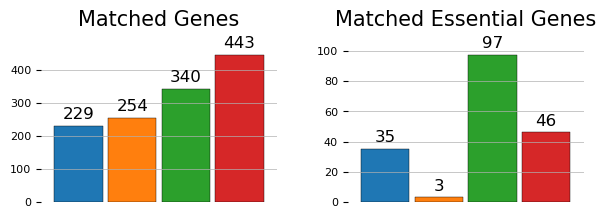

In [19]:
# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,2))  
    
    # Define the axes mapping for two categories
    axes_mapping = {0: axes[0], 1: axes[1]}  # Mapping two axes
    categories = ['Matched Genes', 'Matched Essential Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=16)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=8)

    # Remove border of the plots
    for ax in axes:  # Applies to both axes
        for spine in ax.spines.values():
            spine.set_visible(False)

#     # Create custom handles for the legend
#     custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
#     fig.legend(handles=custom_handles, loc='upper left', bbox_to_anchor=(0.15, 0.9), fontsize=10, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/Essential_genes_coverage_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
create_research_plot(counts_df)

#### Comparisions of Essential genes 

In [21]:
def find_unique_genes(df1, df2, df3):
    """
    Find unique genes in each DataFrame compared to others.
    """
    # Convert gene columns to sets for comparison
    genes_1 = set(df1['gene_exp_ess.id'])
    genes_2 = set(df2['gene_exp_ess.id'])
    genes_3 = set(df3['gene_exp_ess.id'])

    # Find differences
    unique_1 = genes_1 - genes_2 - genes_3
    unique_2 = genes_2 - genes_1 - genes_3
    unique_3 = genes_3 - genes_2 - genes_1

    return unique_1, unique_2, unique_3

def find_gene_reactions(model, unique_genes):
    """
    For each gene, find associated reactions in the given model.
    """
    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            print(f"Gene ID: {gene.id}, Name: {gene.name}")
            print("Associated Reactions:")
            
            # Print associated reactions
            for reaction in gene.reactions:
                print(f" - {reaction.id}: {reaction.reaction}")
        except KeyError:
            print(f"Gene {gene_id} not found in the model.")
            
def find_gene_reactions_to_excel(model, unique_genes, model_name):
    """
    For each gene, find associated reactions in the given model and store results in a DataFrame.
    """
    results = []

    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            
            # Find associated reactions and append results
            for reaction in gene.reactions:
                results.append({
                    'Gene ID': gene.id,
                    'Gene Name': gene.name,
                    'Reaction ID': reaction.id,
                    'Reaction': reaction.reaction,
                    'Model': model_name
                })
        except KeyError:
            results.append({
                'Gene ID': gene_id,
                'Gene Name': 'Not Found',
                'Reaction ID': 'N/A',
                'Reaction': 'N/A',
                'Model': model_name
            })

    # Convert to DataFrame
    return pd.DataFrame(results)


# Step 1: Find unique genes in each model
unique_2101, unique_2291, unique_3K = find_unique_genes(matched_df_2101, matched_df_2291, matched_df_3K)

# Step 2: Find reactions associated with the unique genes for each model
print("\nReactions for unique genes in iCHO2101:")
find_gene_reactions(iCHO2101_changed, unique_2101)

print("\nReactions for unique genes in iCHO2291:")
find_gene_reactions(iCHO2291_changed, unique_2291)

print("\nReactions for unique genes in iCHO3K:")
find_gene_reactions(iCHO3K, unique_3K)

df_2101 = find_gene_reactions_to_excel(iCHO2101_changed, unique_2101, 'iCHO2101')
df_2291 = find_gene_reactions_to_excel(iCHO2291_changed, unique_2291, 'iCHO2291')
df_3K = find_gene_reactions_to_excel(iCHO3K, unique_3K, 'iCHO3K')


combined_df = pd.concat([df_2101, df_2291, df_3K], ignore_index=True)

combined_df.to_excel('unique_genes_reactions.xlsx', index=False)

print("Results successfully saved to 'unique_genes_reactions.xlsx'.")



Reactions for unique genes in iCHO2101:

Reactions for unique genes in iCHO2291:
Gene ID: 100767856, Name: 
Associated Reactions:
 - TRPTRS: atp[c] + trnatrp[c] + trp_L[c] --> amp[c] + h[c] + ppi[c] + trptrna[c]
Gene ID: 100754513, Name: 
Associated Reactions:
 - RNAsyn: 0.104535 atp[c] + 0.097355 ctp[c] + 0.102935 gtp[c] + 0.085376 utp[c] --> 0.3902 ppi[c] + rna[c]
 - RNAsyn_prod: 0.041679 atp[c] + 0.038816 ctp[c] + 0.041041 gtp[c] + 0.03404 utp[c] --> 0.1556 ppi[c] + rna_prod[c]
Gene ID: 100766844, Name: 
Associated Reactions:
 - RNAsyn: 0.104535 atp[c] + 0.097355 ctp[c] + 0.102935 gtp[c] + 0.085376 utp[c] --> 0.3902 ppi[c] + rna[c]
 - RNAsyn_prod: 0.041679 atp[c] + 0.038816 ctp[c] + 0.041041 gtp[c] + 0.03404 utp[c] --> 0.1556 ppi[c] + rna_prod[c]
Gene ID: 100766178, Name: 
Associated Reactions:
 - ALATRS: ala_L[c] + atp[c] + trnaala[c] --> alatrna[c] + amp[c] + ppi[c]
Gene ID: 100689016, Name: 
Associated Reactions:
 - RNAsyn: 0.104535 atp[c] + 0.097355 ctp[c] + 0.102935 gtp[c] + 0

In [25]:
import pandas as pd


##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'
# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_relevant_columns = rxns[['Reaction', 'GPR_yeo', 'GPR_final']]

# Filter rows from rxns_relevant_columns that have Reaction IDs matching combined_df
matching_rxns = rxns_relevant_columns[rxns_relevant_columns['Reaction'].isin(combined_df['Reaction ID'])]

# Loop through the matching reactions and print 'GPR_yeo' and 'GPR_final' for each matching reaction
for rxns_unique in combined_df['Reaction ID']:
    # Find the row in rxns_relevant_columns that matches the rxns_unique
    gpr_info = rxns_relevant_columns[rxns_relevant_columns['Reaction'] == rxns_unique]
    
    if not gpr_info.empty:
        # Extract 'GPR_yeo' and 'GPR_final' for this reaction
        gpr_yeo = gpr_info['GPR_yeo'].values[0]
        gpr_final = gpr_info['GPR_final'].values[0]
        
        # Print or use the GPR information
        print(f"Reaction: {rxns_unique}")
        print(f"GPR_yeo: {gpr_yeo}")
        print(f"GPR_final: {gpr_final}\n")
    else:
        # If the reaction is not found, add it to the 'not_found_reactions' list
        not_found_reactions.append(rxns_unique)

# Print reactions not found in Google Sheet
if not_found_reactions:
    print("\nReactions not found in the Google Sheet:")
    for reaction in not_found_reactions:
        print(reaction)
else:
    print("\nAll reactions found.")

Reaction: RNAsyn
GPR_yeo: 100766101 and 100759724 and 100755901 and 100764912 and 100767957 and 100760982 and 100754513 and 100762430 and 100754156 and 100765460 and 100759832 and 100767472 and 100760680 and 100769834 and 100755742 and 100766844 and 100751282 and 100755604 and 100762645 and 100753811 and 100769706 and 100760805 and 100754072 and 100767520 and 100758205 and 100754830 and 100752999 and 100757843 and 100760363 and 100762946 and 100753139 and 100767495 and 100755521 and 100756173 and 100689016 and 100766803 and 100759490
GPR_final: 100766101 and 100759724 and 100755901 and 100764912 and 100767957 and 100760982 and 100754513 and 100762430 and 100754156 and 100765460 and 100759832 and 100767472 and 100760680 and 100769834 and 100755742 and 100766844 and 100751282 and 100755604 and 100762645 and 100753811 and 100769706 and 100760805 and 100754072 and 100767520 and 100758205 and 100754830 and 100752999 and 100757843 and 100760363 and 100762946 and 100753139 and 100767495 and 1

In [26]:
gpr_info

,Reaction,GPR_yeo,GPR_final
8048,HMR_7610,,100750762 or 100773070


## Comparison of Secretory Pathway Recons

In [ ]:
path = '../Data/Sec_Recon_shared_genes/'

with open(path+'common_jahirs_metrecon.txt', 'r') as file: common_jahirs_metrecon = [line.strip() for line in file]
with open(path+'common_secrecon_jahirs.txt', 'r') as file: common_secrecon_jahirs = [line.strip() for line in file]
with open(path+'common_secrecon_metrecon.txt', 'r') as file: common_secrecon_metrecon = [line.strip() for line in file]
with open(path+'unique_secrecon_metrecon.txt', 'r') as file: unique_secrecon_metrecon = [line.strip() for line in file]

In [ ]:
# Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

rxns_secrecon_metrecon = []
subs_secrecon_metrecon = []
for g in iCHO3000.genes:
    if str(g) in unique_secrecon_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_secrecon_metrecon:
                rxns_secrecon_metrecon.append(rxn.id)
                subs_secrecon_metrecon.append(rxn.subsystem)


# Subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

rxns_jahirs_metrecon = []
subs_jahirs_metrecon = []
for g in iCHO3000.genes:
    if str(g) in common_jahirs_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_jahirs_metrecon:
                rxns_jahirs_metrecon.append(rxn.id)
                subs_jahirs_metrecon.append(rxn.subsystem)

In [ ]:
# Pie Chart Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

subsystem_counts = Counter(subs_secrecon_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_secrecon.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Pie Chart of subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

subsystem_counts = Counter(subs_jahirs_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_jahirs.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Count how many reactions from the rxns_secrecon_metrecon come from Recon3D

c=0
for i, row in rxns.iterrows():
    if (row['iCHO1766']=='-') and (row['iCH02101']=='-') and (row['iCHO2291']=='-'): #Check if the reactions has been added from Recon3D or other databases
        r = str(row['Reaction'])
        if r in rxns_secrecon_metrecon:
            c+=1
print(len(rxns_secrecon_metrecon))
print(c)